# CSM Tutorial

## Linear Bar Elements Problems

In this tutorial, we will show the typical workflow of solving a linear bar elements problem using the CSM (Computational Solid Mechanics) framework. As we will see, the framework allows to easily define the problem and solve it quickly in very few lines of code.
Two examples will be presented, showcasing different features of the framework.

### Problem Description

The linear bar element is a simple one-dimensional element; it is defined by its length `L`, its cross-sectional area `A` and its elasticity modulus `E`. Each linear bar element has two nodes and the element stiffness matrix is defined as:

$$
k_{el} = \frac{EA}{L}\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
$$

The linear bar element has two degrees of freedom (DOFs), one at each node. Therefore, for a structure with `n` nodes, the global stiffness matrix `K` will be a `n x n` matrix. The global stiffness matrix is assembled from the element stiffness matrices and has to be symmetric and positive definite. Once the global stiffness matrix is assembled, the following system of equations is obtained:

$$
K \cdot U = F
$$

where `U` is the global nodal displacement vector and `F` is the global nodal force vector.

After imposing the boundary conditions, the system of equations can be solved for the unknown nodal displacements. The element forces can then be computed using the element stiffness matrix and the nodal displacements.

### Example Problem 1

In this first example, we will solve a simple problem consisting of a tapered bar with a length `L = 3.0 m`, a cross-sectional area `A(x) = 0.002 + (0.01 * x)/3 (m^2)` and an elasticity modulus `E = 210 GPa`. The bar is fixed at one end and subjected to a force of `F = 18 kN` at the other end; finally, the bar is composed of 5 linear bar elements of equal length `L_e = 0.6 m`, which means that 6 nodes are needed to define the problem. The cross-sectional area for each element is computed at the center of the element.

### Solution Steps using CSM
1. **Import Required Libraries**: first, we need to import the LinearBarProblem class from the CSM framework.

In [337]:
# Import the necessary libraries
from CSM import LinearBarProblem

2. **Define the Problem**: we define the problem parameters, including the nodes, elements, elasticity modulus and cross-sectional area (which in this case is a function of the position along the bar). The nodes are defined as a list of tuples, where each tuple contains the coordinates of the node. The elements are defined as a list of tuples, where each tuple contains the indices of the nodes that form the element. The elasticity modulus is defined as a constant float, while the cross-sectional area can be defined both as a constant float or as a callable object (function).

In [338]:
# Define the parameters for the linear bar problem
nodes = [(0, 0), (0.6, 0), (1.2, 0), (1.8, 0), (2.4, 0), (3, 0)] # 6 nodes
elements = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)] # 5 elements
elasticity_modulus = 210e6
def cross_sectional_area(x):
    A = 0.002 + 0.01 * x / 3
    return A

3. **Create the Problem Instance**: we create an instance of the LinearBarProblem class and set the problem parameters.

In [339]:
# Create an instance of the LinearBarProblem class
bar = LinearBarProblem(nodes, elements, elasticity_modulus, cross_sectional_area)

We can visualize the problem's structure using the `plot_linear_bar` method, which will show the nodes and elements of the problem:

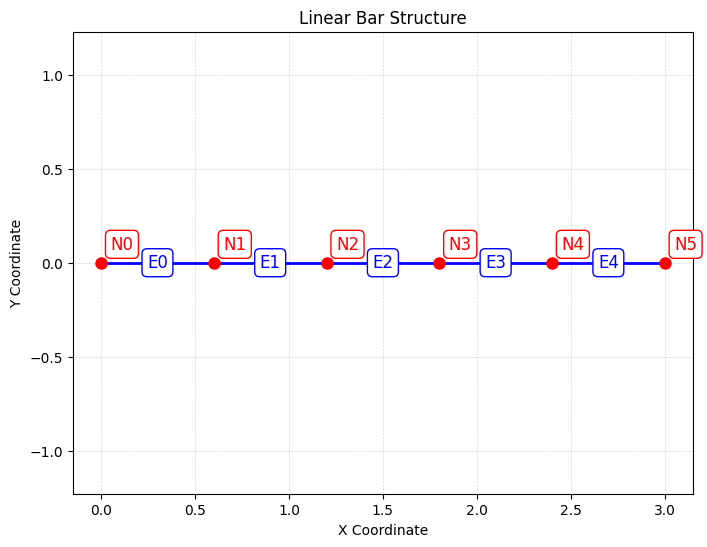

In [340]:
bar.plot_linear_bar() # Plot the linear bar structure

We can also inspect the length of each element calling the `get_length` method, which takes the element index as an argument:

In [341]:
# For example, print the length of the third element (index 2)
print(bar.get_length(2), "m")

0.6000000000000001 m


If we need some information about the LinearBarProblem class or some of its methods, we can use the `help` function to get a list of all the methods and their docstrings. For example, to get help on the `get_length` method, we can do:

In [342]:
help(bar.get_length)

Help on method get_length in module CSM.linear_bar:

get_length(element_index) method of CSM.linear_bar.LinearBarProblem instance
    Get the length of the element.
    
    Parameters:
    element_index (int): Index of the element.
    
    Returns:
    float: Length of the element.



4. **Assemble the Global Stiffness Matrix**: we call the `assemble_global_stiffness` method to assemble the global stiffness matrix. As mentioned earlier, the global stiffness matrix is obtained by assembling the element stiffness matrices.

In [343]:
K = bar.assemble_global_stiffness()
# Print the global stiffness matrix
print("Global stiffness matrix:")
print(K)

Global stiffness matrix:
[[ 1050000. -1050000.        0.        0.        0.        0.]
 [-1050000.  2800000. -1750000.        0.        0.        0.]
 [       0. -1750000.  4200000. -2450000.        0.        0.]
 [       0.        0. -2450000.  5600000. -3150000.        0.]
 [       0.        0.        0. -3150000.  7000000. -3850000.]
 [       0.        0.        0.        0. -3850000.  3850000.]]


5. **Apply Boundary Conditions** (*optional*): we apply the boundary conditions by setting the fixed node's displacement to zero. To do this, we can use the `set_external_constraints` method, which takes a list as input. Each element of the list is the index of the node that is fixed. In this case, we will set the last node (index 5) as fixed. The method will also partition the global stiffness matrix `K`, removing the rows and columns corresponding to the fixed node. The resulting matrix will be a reduced matrix that can be used to solve the system of equations.

In [344]:
Reduced_K = bar.set_external_constraints([5])
# Print the reduced stiffness matrix
print("Reduced stiffness matrix:")
print(Reduced_K)

Reduced stiffness matrix:
[[ 1050000. -1050000.        0.        0.        0.]
 [-1050000.  2800000. -1750000.        0.        0.]
 [       0. -1750000.  4200000. -2450000.        0.]
 [       0.        0. -2450000.  5600000. -3150000.]
 [       0.        0.        0. -3150000.  7000000.]]


6. **Solve the System of Equations**: we call the `solve` method to solve the system of equations for the unknown nodal displacements. The method returns the global nodal displacement vector `U`, which contains the displacements of all nodes in the system. In doing so, the method will also automatically call the `set_external_constraints` method to apply the boundary conditions and therefore we don't need to call it explicitly as we did in the previous step just to show how it works. The `solve` method takes as input the list of external forces `F` and the list of fixed nodes.

In [345]:
F = [-18, 0, 0, 0, 0] # Define the force vector
fixed_nodes = [5] # Define the fixed nodes
# Solve the system with the given force vector and fixed nodes
U = bar.solve(F, fixed_nodes)
# Print the displacement vector
print("Displacement vector (m):")
print(U)

Displacement vector (m):
[-4.51651206e-05 -2.80222635e-05 -1.77365492e-05 -1.03896104e-05
 -4.67532468e-06  0.00000000e+00]


We can obtain the displacement of a specific node by calling the `get_displacement` method, which takes as input the index of the node. The method returns the displacement of the node:

In [346]:
# Get the displacement of the second node
u2 = bar.get_displacement(1)
# Print the displacement of the second node
print("Displacement of node 2 (m):")
print(u2)

Displacement of node 2 (m):
-2.8022263450834875e-05


7. **Compute the Reaction Forces**: we can get the global force vector `F` by calling the `get_reaction_forces` method. This method returns the global force vector `F`, which contains the forces acting on all nodes in the system.

In [347]:
# Get the reaction forces
F = bar.get_reaction_forces()
# Print the reaction forces
print("Reaction forces (kN):")
print(F)

Reaction forces (kN):
[-1.80000000e+01  0.00000000e+00  0.00000000e+00 -1.16115767e-14
  3.11041340e-15  1.80000000e+01]


8. **Compute the Element Forces**: we can get the element forces by calling the `get_element_force` method. This method takes as input the index of the element and returns the vector of forces acting on the element.

In [348]:
# For example, get the element forces for the 5-th element (index 4)
f = bar.get_element_force(4)
# Print the element forces
print("Element 4 forces (kN):")
print(f)

Element 4 forces (kN):
[-18.  18.]


9. **Compute the Element Stresses**: we can get the element stresses by calling the `get_element_stress` method. This method takes as input the index of the element and returns the vector of stresses acting on the element.

In [349]:
# For example, get the element stresses for the 5-th element (index 4)
stress = bar.get_element_stress(4)
# Print the element stresses
print("Element 4 stresses (kN/m^2):")
print(stress)

Element 4 stresses (kN/m^2):
[-1636.36363636  1636.36363636]


### Example Problem 2

In this second example, we will solve a simple problem consisting of a structure with length `L = 4.0 m`, cross-sectional area `A = 0.005 m^2` and elasticity modulus `E = 70 GPa`. The structure is fixed at one end and subjected to a force of `F = 15 kN` at the other end; the second node is subjected to a force of `F' = 10 kN` in the opposite direction with respect to the first one
Finally, the structure is composed of 3 linear bar elements of lengths `L_e = 1.0, 2.0, 1.0 m`, which means that 4 nodes are needed to define the problem. The cross-sectional area is constant for all elements.

### Solution Steps using CSM

We will follow the same steps as in the previous example to solve this problem very quickly and easily using the CSM framework.

First we define the problem and visualize its structure:

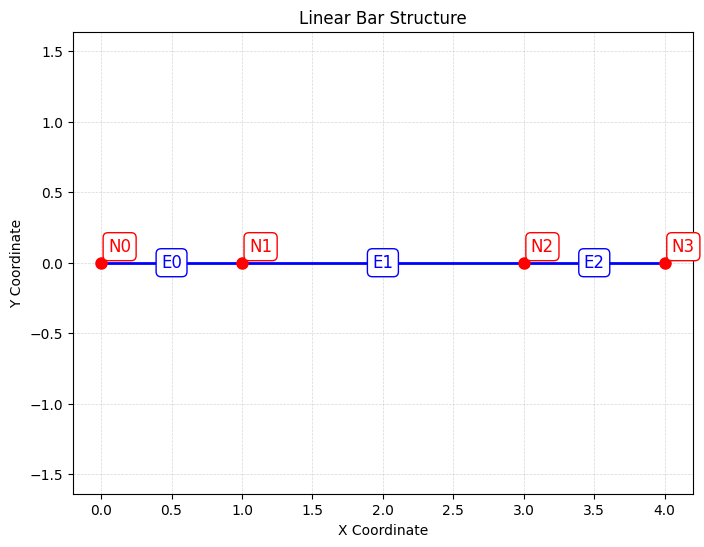

In [350]:
nodes = [(0, 0), (1, 0), (3, 0), (4, 0)] # 4 nodes
elements = [(0, 1), (1, 2), (2, 3)] # 3 elements
elasticity_modulus = 70e6
cross_sectional_area = 0.005 # Define a constant cross-sectional area this time
# Create another instance of the LinearBarProblem class
bar = LinearBarProblem(nodes, elements, elasticity_modulus, cross_sectional_area)

# Plot the linear bar problem
bar.plot_linear_bar()

We then assemble the global stiffness matrix:

In [351]:
K = bar.assemble_global_stiffness()
# Print the global stiffness matrix
print("Global stiffness matrix:")
print(K)

Global stiffness matrix:
[[ 350000. -350000.       0.       0.]
 [-350000.  525000. -175000.       0.]
 [      0. -175000.  525000. -350000.]
 [      0.       0. -350000.  350000.]]


We can then solve the problem and get the global nodal displacements:

In [352]:
F = [-10, 0, 15] # Define the force vector
fixed_nodes = [0] # Define the fixed nodes
# Solve the system with the given force vector and fixed nodes
U = bar.solve(F, fixed_nodes)
# Print the displacement vector
print("Displacement vector (m):")
print(U)

Displacement vector (m):
[0.00000000e+00 1.42857143e-05 1.00000000e-04 1.42857143e-04]


Finally, we can compute the reaction forces and the element stresses:

In [353]:
# Get the reaction forces
F = bar.get_reaction_forces()
# Print the reaction forces
print("Reaction forces (kN):")
print(F)

Reaction forces (kN):
[-5.00000000e+00 -1.00000000e+01 -7.10542736e-15  1.50000000e+01]


In [354]:
for i in range(len(elements)):
    # Get the element stresses for the i-th element
    stress = bar.get_element_stress(i)
    # Print the element stresses
    print(f"Element {i} stresses (kN/m^2):")
    print(stress)

Element 0 stresses (kN/m^2):
[-1000.  1000.]
Element 1 stresses (kN/m^2):
[-3000.  3000.]
Element 2 stresses (kN/m^2):
[-3000.  3000.]
